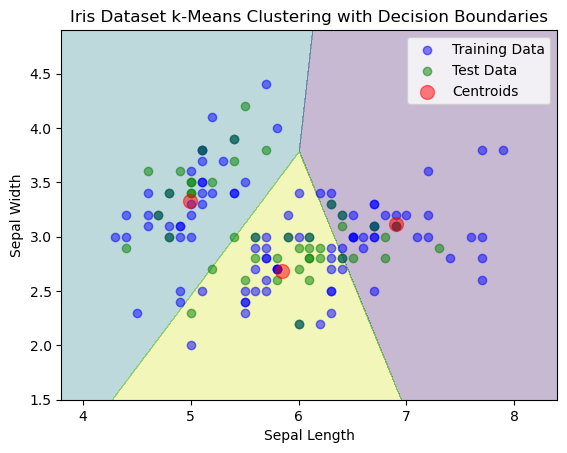

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (Sepal Length and Sepal Width) for simplicity
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Number of clusters (we know there are 3 species)
k = 3

# Apply k-Means on the training data
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)

# Create a mesh grid for the decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Predict the cluster for each point on the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plotting the training and test data
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Training Data', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', label='Test Data', alpha=0.5)

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Centroids', s=100, alpha=0.5)

plt.title("Iris Dataset k-Means Clustering with Decision Boundaries")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

